# Diagnostics for importance sampling

This notebook illustrates the use of some simple diagnostics for Importance Sampling. For IS, in extreme settings only a few samples may have a significant weight, yielding poor approximations of the target pdf $p(x)$. A popular diagnostics is the Effective Sample Size (ESS), which is theoretically defined as the number of independent samples generated directly form the target distribution that are required to obtain an estimator with same variance as the one obtained from IS. Heuristically, ESS approximates how many i.i.d. samples, drawn from the target, are equivalent to $N$ weighted samples drawn from the IS or MCMC approximation. An approximation of the ESS is given by [1]:
$$ ESS = \frac{1}{\sum \tilde{w}^2} $$
where $\tilde{w}$ are the normalized weights.

[1] *Sequential Monte Carlo Methods in Practice*, A. Doucet, N. de Freitas, and N. Gordon, 2001, Springer, New York

In [1]:
from UQpy.Distributions import Uniform, JointInd
from UQpy.SampleMethods import IS
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def log_Rosenbrock(x, param):
     return (-(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/param)

In [3]:
proposal = JointInd([Uniform(loc=-8, scale=16), Uniform(loc=-10, scale=60)])
print(proposal.get_params())

{'loc_0': -8, 'scale_0': 16, 'loc_1': -10, 'scale_1': 60}


In [4]:
w = IS(log_pdf_target=log_Rosenbrock, args_target=(20, ), nsamples=5000, proposal=proposal)

### Look at distribution of weights

max_weight = 0.028758023564391163, min_weight = 0.0 



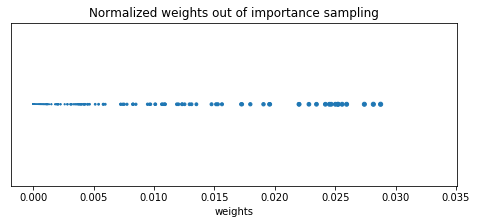

In [8]:
print('max_weight = {}, min_weight = {} \n'.format(max(w.weights), min(w.weights)))

fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter(w.weights, np.zeros((np.size(w.weights), )), s=w.weights * 600, marker='o')
ax.set_xlabel('weights')
ax.set_title('Normalized weights out of importance sampling')
ax.tick_params(which='both', left=False, labelleft=False) # labels along the bottom edge are off
plt.show(fig)

### Compute the effective sample size

In [6]:
effective_sample_size = 1. / np.sum(w.weights ** 2, axis=0)

print('Effective sample size is ne={}, out of a total number of samples={} \n'.
      format(effective_sample_size, np.size(w.weights)))

Effective sample size is ne=62.89155366504611, out of a total number of samples=5000 

